[View in Colaboratory](https://colab.research.google.com/github/ditiansm2015/Industrial_training_final_project/blob/master/BigMart_Sales.ipynb)

In [0]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Big Mart Sales Data Analysis and Prediction

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!['Mart sale'](https://s3.ap-south-1.amazonaws.com/datahack-prod/profile_photos/final-grocery_480.png)

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/ditiansm2015/Industrial_training_final_project/master/Big_mart.csv')

Let's view the first ten rows of the imported Dataset. For this we use head()

In [0]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Let's view the last ten rows of the imported Dataset. For this we use tail()

In [0]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


Shape of the dataset

In [0]:
df.shape

(8523, 12)

Size of the dataset

In [0]:
df.size

102276

Statistical analysis of the Dataset

In [0]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


Checking for uniqueness of elements of datapoints

Item_Fat_Content datapoint has redundant values
"LF" and "low fat" as Low Fat 

In [0]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Showing Unique values of Item_Type datapoint

In [0]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Showing unique values of Outlet_Size datapoint

In [0]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

Showing unique values of Outlet_Location_Type datapoint

In [0]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

Showing unique values of Outlet_Type datapoint

In [0]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Replacing "low fat" and "lf" with "Low Fat" and "reg" with "Regular"

In [0]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','lf':'Low Fat','low fat':'Low Fat'})

Displaying unique values of Item_Fat_Content 

In [0]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Checking for null values in datapoints

The below displayed output reveals that "Item_Weight" and "Outlet_Size" Datapoints have 1463 and 2410 null values respectively

In [0]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing null values in Item_Weight to its mean values

In [0]:
# Replacing Null values of Item_Weight with mean value
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis on BIG MARTS SALES

## Univariate Analysis

"Uni" means one, "Variate" means variable.Thus Univariate means one variable.Hence in Univariate Analysis we focus on just one variable at a time. Univariate annalysis helps in finding out the Outliers present in the dataset.

We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.

### Item_Weight-Count plot

From the Item_Weight - Count plot we can say that:
1. Maximumm number of products have weight ranging between 12 units to 13 units
2. Least number of products have weight ranging between  0.5 units to 0.6 units
3. The plot does not show any outlier

(array([  67.,  148.,  268.,  275.,  254.,  341.,  278.,  317.,  270.,
         246.,  239.,  179.,  293.,  265., 1684.,  242.,  206.,  181.,
         239.,  287.,  229.,  274.,  170.,  291.,  215.,  243.,  219.,
         229.,  280.,   94.]),
 array([ 4.555     ,  5.11483333,  5.67466667,  6.2345    ,  6.79433333,
         7.35416667,  7.914     ,  8.47383333,  9.03366667,  9.5935    ,
        10.15333333, 10.71316667, 11.273     , 11.83283333, 12.39266667,
        12.9525    , 13.51233333, 14.07216667, 14.632     , 15.19183333,
        15.75166667, 16.3115    , 16.87133333, 17.43116667, 17.991     ,
        18.55083333, 19.11066667, 19.6705    , 20.23033333, 20.79016667,
        21.35      ]),
 <a list of 30 Patch objects>)

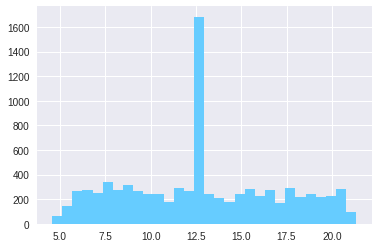

In [0]:
plt.hist(x = 'Item_Weight' , data = df , bins=30,color='#66ccff')

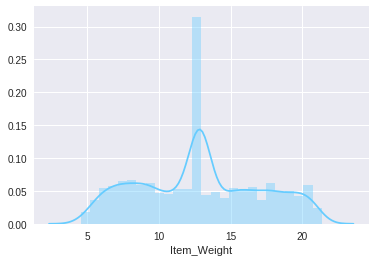

In [0]:
sns.distplot(df['Item_Weight'],color='#66ccff')

### Item_Fat_Content-Count plot

From the Item_Fat_Content - Count plot we can say that:
1. Low fat content items are higher in numbe as compared to Regular fat content

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


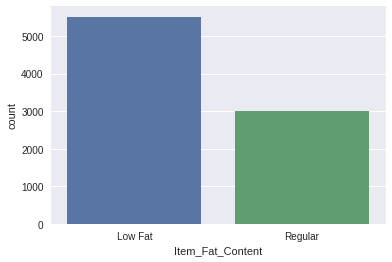

In [0]:
sns.countplot(x = 'Item_Fat_Content', data = df)

### Item_Type - Count plot

From the Item_Type - Count plot we can say that:
1. Items corresponding to Fruits and Vegetables have highest quantity
2. Seafoods are in least quantity
3. Snack foods are present in second highest quantity after Fruits and Vegetables

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


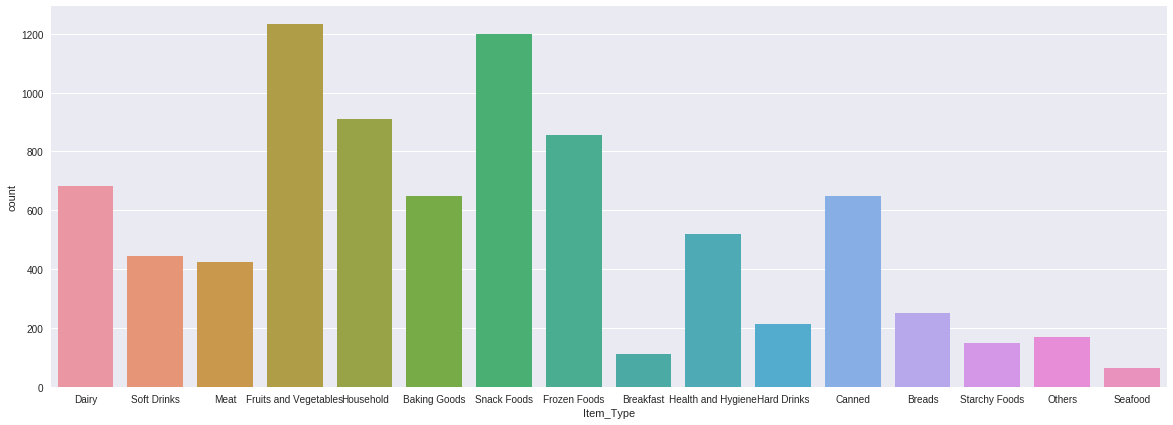

In [0]:
plt.figure(figsize=(20,7))    # tO increase spacing on X label hence preventing overlapping of X Labels
sns.countplot(x='Item_Type',data=df)

### Item_MRP - Count plot

From the Item_MRP - Count plot we can say that:
1. Most of the items have price ranging between Rs 100 - Rs 125
2. Lowest price is between Rs 125 to Rs 135


(array([272., 352., 299., 313., 105., 155., 280., 368., 405., 392., 429.,
        427., 287.,  87., 430., 405., 361., 332., 427., 391., 382., 195.,
        115., 170., 191., 212., 154., 167., 215., 205.]),
 array([ 31.29   ,  39.14328,  46.99656,  54.84984,  62.70312,  70.5564 ,
         78.40968,  86.26296,  94.11624, 101.96952, 109.8228 , 117.67608,
        125.52936, 133.38264, 141.23592, 149.0892 , 156.94248, 164.79576,
        172.64904, 180.50232, 188.3556 , 196.20888, 204.06216, 211.91544,
        219.76872, 227.622  , 235.47528, 243.32856, 251.18184, 259.03512,
        266.8884 ]),
 <a list of 30 Patch objects>)

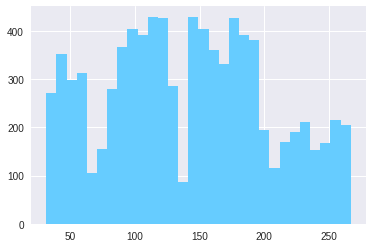

In [0]:
plt.hist(x = 'Item_MRP' , data = df , bins=30,color='#66ccff')

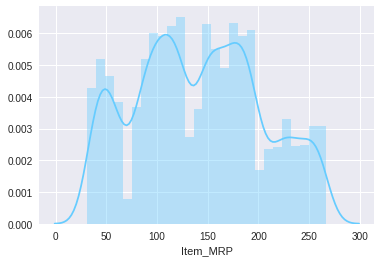

In [0]:
sns.distplot(df['Item_MRP'],color='#66ccff')

### Outlet_Size - Count plot

From the Outlet_Size - Count plot we can say that:
1. Medium size outlets have highest sales
2. High size outlets have least sales

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


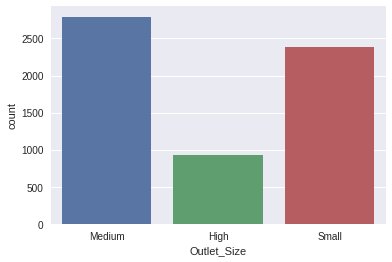

In [0]:
sns.countplot(x='Outlet_Size',data=df)

### Outlet_Location_Type - Count plot

From the Outlet_Location_Type - Count plot we can say that:
1. Most of the Outlets are in Tier 3 location
2. Least number of the Outlets are in Tier 1 location

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


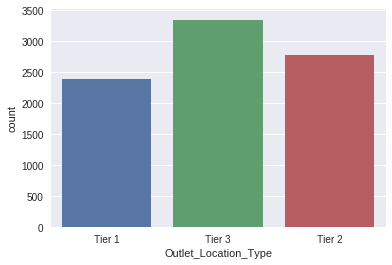

In [0]:
sns.countplot(x='Outlet_Location_Type',data=df)

### Outlet_Type - Count plot

From the Outlet_Type - Count plot we can say that:
1. Most of the sales is done at Sypermarket Type 1
2. Supermarket Type 3 has least sales
3. Thus it may be concluded that Supermarket Type 1 is most popular while Supermarket Type3 is least popular

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


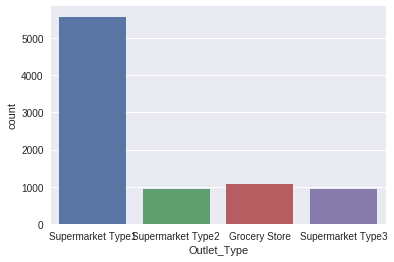

In [0]:
sns.countplot(x='Outlet_Type',data=df)

### Item_Outlet_Sales - Count plot

From the Item_Outlet_Sales - Count plot we can say that:
1. Most of the Item sales is from 0 to 1400 in quantity
2. The plot shows right skewness

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

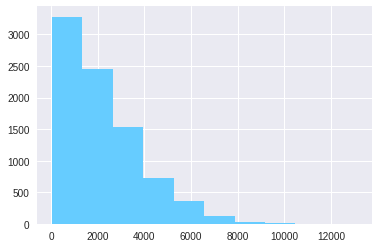

In [0]:
plt.hist(x = 'Item_Outlet_Sales' , data = df , bins=10,color='#66ccff')

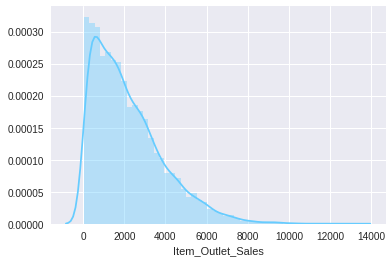

In [0]:
sns.distplot(df['Item_Outlet_Sales'],color='#66ccff')

## Bivariate analysis


Bi" means two while "variate" means variable.So Bivariate means two variables. Hence Bivariate Analysis works on two different variables showing how they are correlated. Bivariate analysis shows us the dependency of one attribute on another.

Let's see the correlation between two variables:

Let's see the correlation between datapoints


In [0]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


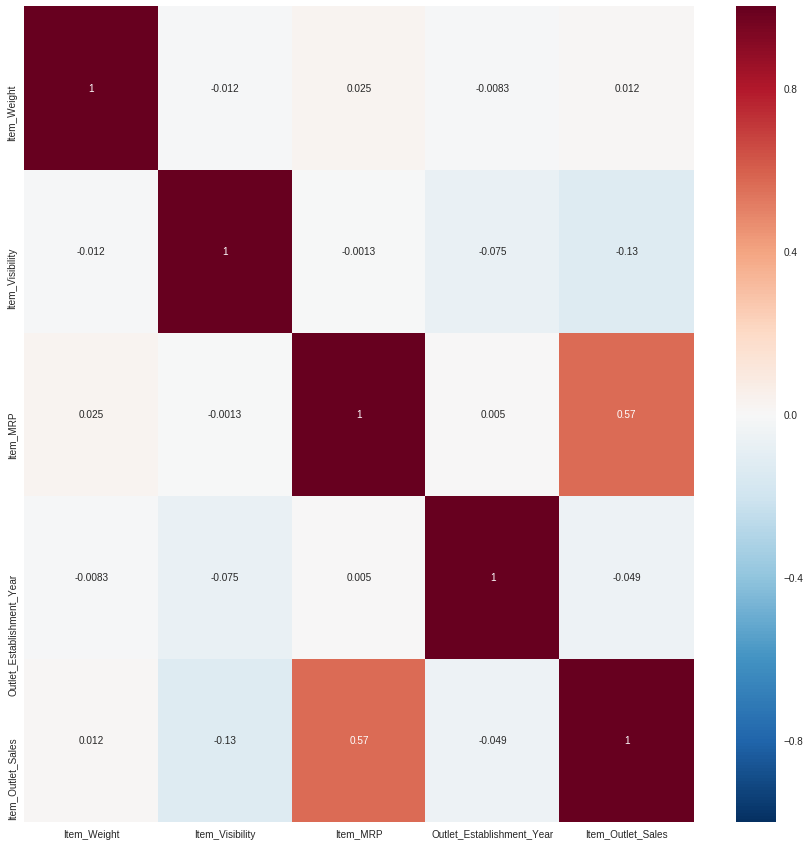

In [0]:
# annot=True shows the relation magnitude(the numbers on each block) between two attributes
# plt.figure(figsize=(1,10)) resizes the figure and it should be written before creating the plot.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Item_Weight - Item_Outlet_Sales plot

From the Item_Weight - Item_Outlet_Sales plot we can say that:
1. There is slightly positive correlation between the two features
2. Item weight of 12.5 units has maximum sales

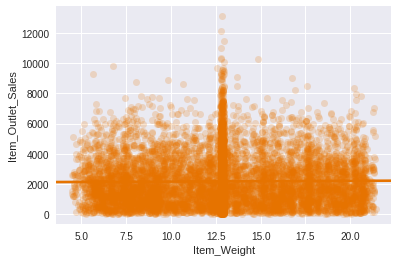

In [0]:
sns.regplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = df , x_jitter=0.1, scatter_kws={'alpha':0.2},color='#e67300')

### Item_MRP - Item_Outlet_Sales plot

From the Item_MRP - Item_Outlet_Sales plot we can say that:
1. There is highly positive correlation between the datapoints
2. Highest number of sales is for Rs 200 - Rs 250 priced items
3. Thus we can conclude that higher is the price of the item higher is its demand

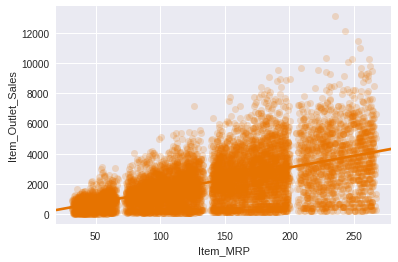

In [0]:
sns.regplot(y = 'Item_Outlet_Sales',x = 'Item_MRP',data = df , x_jitter=0.1, scatter_kws={'alpha':0.2},color='#e67300')

### Item_Visibility - Item_Outlet_Sales plot

From the Item_Visibility - Item_Outlet_Sales plot we can say that:
1. There is negative correlation between Item_Visibility and Item_Outlet
2. Higher is the visibility lower is the sale of item

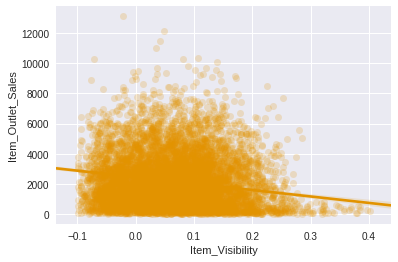

In [0]:
sns.regplot(y= 'Item_Outlet_Sales',x="Item_Visibility",data = df , x_jitter=0.1, scatter_kws={'alpha':0.2},color='#e29300')

Converting missing values of Outlet_Size with their mode values we get to see that:
1. Supermarket Type1 has mode = Small
2. Supermarket Type2 has mode = Medium
3. Supermarket Type3 has mode = Medium
4. Grocery Store has mode = Small

In [0]:
st1=df[df['Outlet_Type']=="Supermarket Type1"]['Outlet_Size'].mode()
st2=df[df['Outlet_Type']=="Supermarket Type2"]['Outlet_Size'].mode()
st3=df[df['Outlet_Type']=="Supermarket Type3"]['Outlet_Size'].mode()
gs=df[df['Outlet_Type']=="Grocery Store"]['Outlet_Size'].mode()

print(st1,st2,st3,gs)

0    Small
dtype: object 0    Medium
dtype: object 0    Medium
dtype: object 0    Small
dtype: object


In [0]:
df['Outlet_Size']=np.where(((df['Outlet_Size'].isnull())&
                            (df['Outlet_Type']=="Grocery Store")),\
                            "Small",df['Outlet_Size'])
df['Outlet_Size']=np.where(((df['Outlet_Size'].isnull())&
                            (df['Outlet_Type']=="Supermarket Type1")),\
                            "Small",df['Outlet_Size'])
df['Outlet_Size']=np.where(((df['Outlet_Size'].isnull())&
                            (df['Outlet_Type']=="Supermarket Type2")),\
                            "Medium",df['Outlet_Size'])
df['Outlet_Size']=np.where(((df['Outlet_Size'].isnull())&
                            (df['Outlet_Type']=="Supermarket Type3")),\
                            "Medium",df['Outlet_Size'])

Converting Object type to numeric type using Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = label_encoder.fit_transform(df['Outlet_Identifier'])
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Item_Identifier'] = label_encoder.fit_transform(df['Item_Identifier'])
df['Outlet_Size'] = label_encoder.fit_transform(df['Outlet_Size'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [0]:
# importing cross_val_score to perform cross validation
from sklearn.model_selection import cross_val_score

In [0]:
# importing train_test_split to split the dataset into training set and test set
from sklearn.cross_validation import train_test_split

In [0]:
# declaring 'Item_Outlet_Sales' as output variable
labels = df['Item_Outlet_Sales']

# Drop non important attributes from the training set
xtrain = df.drop(['Item_Outlet_Sales','Outlet_Location_Type','Item_Identifier','Outlet_Establishment_Year'],axis=1)

In [0]:
# breaking dataset as test and train set
x_train , x_test , y_train , y_test = train_test_split(xtrain , labels , test_size = 0.30,random_state =1)

## Applying Regression

### Applying Linear Regression

In [0]:
 #importing LinearRegression library
from sklearn.linear_model import LinearRegression

In [0]:
reg=LinearRegression()

In [0]:
# fitting training set into model
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Regression Score is:

In [0]:
reg.score(x_test,y_test)

0.5033827274867799

After applying cross validation on linear regression score is:

In [0]:
scores = cross_val_score(reg, xtrain,labels, cv=6)
print(scores)

[0.51997278 0.49901633 0.48084191 0.51213685 0.49718148 0.49774318]


### Applying Random Forest Regresion 

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfr=RandomForestRegressor()

In [0]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Random Forest Regression Score is:

In [0]:
rfr.score(x_test,y_test)

0.5396895060860278

After applying cross validation on Random Forest Regression  score is:

In [0]:
scores_rfr = cross_val_score(rfr, xtrain,labels, cv=6)
print(scores_rfr)

[0.52771562 0.49143368 0.47475975 0.55060028 0.51730828 0.53690376]


### Applying Stochastic Gradient Boosting Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
sgbr= GradientBoostingRegressor()

In [0]:
sgbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [0]:
sgbr.score(x_test,y_test)

0.6065580145746842